
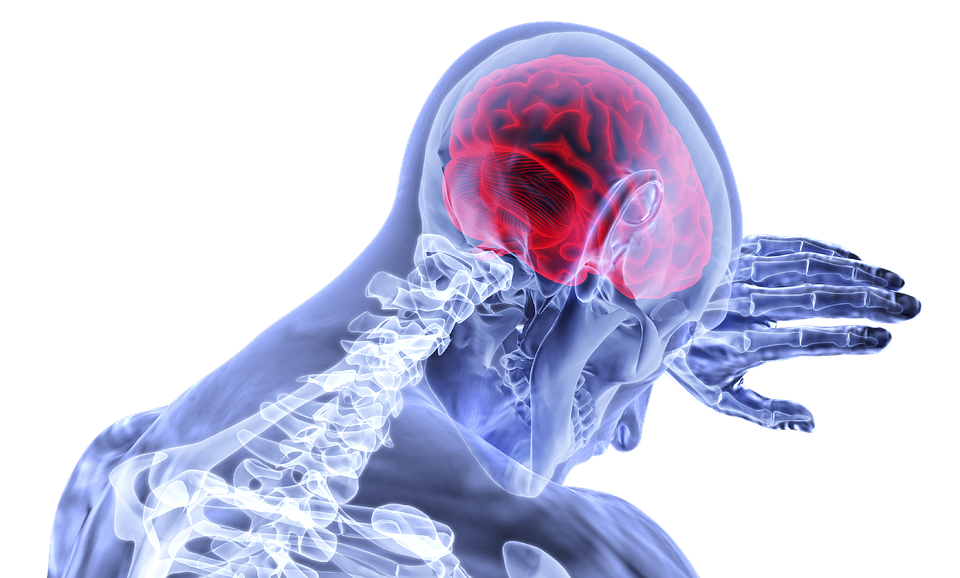

# Stroke Prediction and Data Visualization with Machine Learning



According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [1]:
! pip install -U imbalanced-learn
! pip install xgboost
! pip install mlxtend
! pip install --upgrade scikit-learn

## Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import preprocessing
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from mlxtend.classifier import StackingClassifier
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
%config InlineBackend.figure_format = 'png'

## About the Features



1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Load Data

In [3]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv') #reading the data

## Exploratory Data Analysis

In [4]:
df.head() #show first 5 row

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail() #show last 5 row 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.age = df.age.round().astype('int')

In [7]:
df = df.drop('id', axis = 1) #drop id

In [8]:
df[df.gender=="Other"] #show gender = other 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [9]:
df= df.drop(index = 3116) #drop this row by index

In [10]:
df['gender'].value_counts() #show all gender value 

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
# replace every yes with married and every no with single 
df['ever_married'].replace({"Yes": "married", "No": "single"}, inplace=True) 

In [12]:
df["ever_married"].value_counts() #show all every married value 

married    3353
single     1756
Name: ever_married, dtype: int64

In [13]:
# replace every 1 with yes and every 0 with no 
df['stroke'].replace({1: "yes", 0: "no"}, inplace=True) 

In [14]:
df["stroke"].value_counts() #show all stroke value 

no     4860
yes     249
Name: stroke, dtype: int64

In [15]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset") # #show number of rows and columns

There is 5109 observation and 11 columns in the dataset


In [16]:
df.columns #show columns name 

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
df.describe().T #summary statistic 

,count,mean,std,min,25%,50%,75%,max
age,5109.0,43.229986,22.613660,0.00,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.50,28.10,33.10,97.60


In [18]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value") #show unique value 

age has 83 unique value
hypertension has 2 unique value
heart_disease has 2 unique value
avg_glucose_level has 3978 unique value
bmi has 418 unique value


In [19]:
#show numircal and categorical columns 
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'stroke'],
      dtype='object')


In [20]:
df.duplicated().value_counts() #show duplicated value 

False    5109
dtype: int64

## Check for NaN values

In [21]:
stroke_list = list(df.columns.values) #show all null value 

for stroke in stroke_list:
    print (stroke,": ",sum(pd.isnull(df[stroke])))

gender :  0
age :  0
hypertension :  0
heart_disease :  0
ever_married :  0
work_type :  0
Residence_type :  0
avg_glucose_level :  0
bmi :  201
smoking_status :  0
stroke :  0


#### We have 201 NaN in bmi .

I want to delete null values

In [22]:
df = df.dropna() #drop null value 

In [23]:
stroke_list = list(df.columns.values) #show all null value 

for stroke in stroke_list:
    print (stroke,": ",sum(pd.isnull(df[stroke])))

gender :  0
age :  0
hypertension :  0
heart_disease :  0
ever_married :  0
work_type :  0
Residence_type :  0
avg_glucose_level :  0
bmi :  0
smoking_status :  0
stroke :  0


## Remove outliers

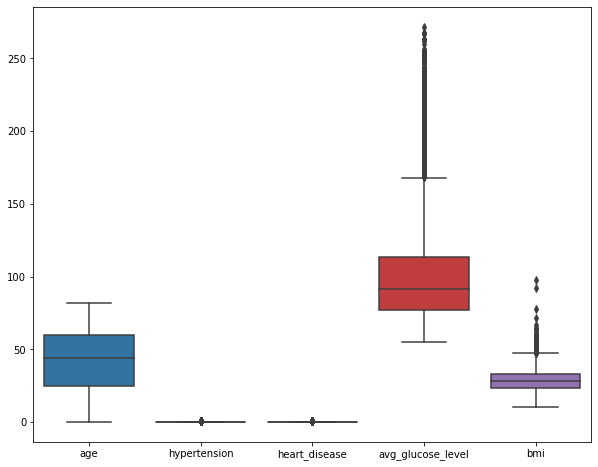

In [24]:
plt.figure(figsize = [10,8]) 
sns.boxplot(data=df);#show all outlier 

In [25]:
#this function replace all outlier with mean 
def clean_outlier(column):
    q1 = np.quantile(df[column], 0.45)
    q3 = np.quantile(df[column], 0.74)
    IQR = q3 - q1
    
    min_range = q1 - 1.5 * IQR
    max_range = q3 + 1.5 * IQR
    
    mean = df[column].mean()
    df.loc[(df[column] < min_range), column] = mean
    df.loc[(df[column] > max_range), column] = mean
    

clean_outlier('avg_glucose_level')
clean_outlier('bmi')

pd.set_option('display.float_format', lambda x:'%.2f'% x)
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4908.00,4908.00,4908.00,4908.00,4908.00
mean,42.87,0.09,0.05,91.85,28.61
std,22.56,0.29,0.22,19.51,4.91
min,0.00,0.00,0.00,55.12,18.90
25%,25.00,0.00,0.00,77.07,25.10
50%,44.00,0.00,0.00,91.68,28.89
75%,60.00,0.00,0.00,105.30,31.50
max,82.00,1.00,1.00,147.74,41.10


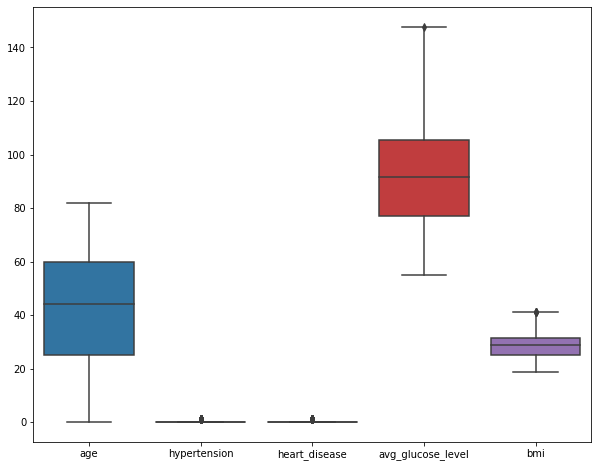

In [26]:
plt.figure(figsize = [10,8])
sns.boxplot(data=df); #show all outlier

## Solve the Questions

## Q1: Who are most at risk for a stroke, urban populations or rural populations ?

In [27]:
ss=df.groupby(["Residence_type"])[["stroke"]].count()
ss

,stroke
Residence_type,
Rural,2418
Urban,2490


## Q2:Who is more likely to have a stroke male or female ?

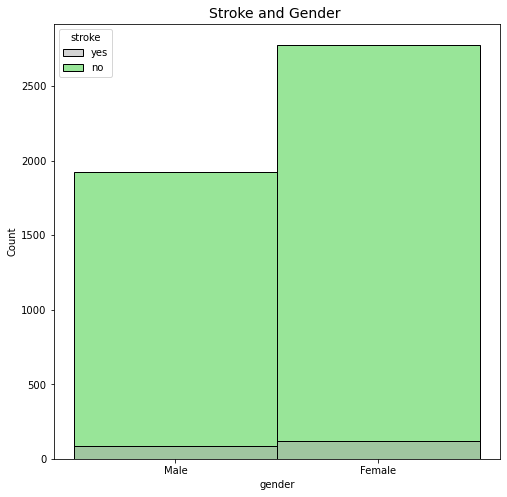

In [28]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x="gender", hue="stroke" , palette=["#A9A9A9","#32CD32"]);
plt.title("Stroke and Gender ",fontsize =14);#This statement for write in Title 
plt.savefig('SDAIA.png')

## Q3:Is age a cause of stroke?

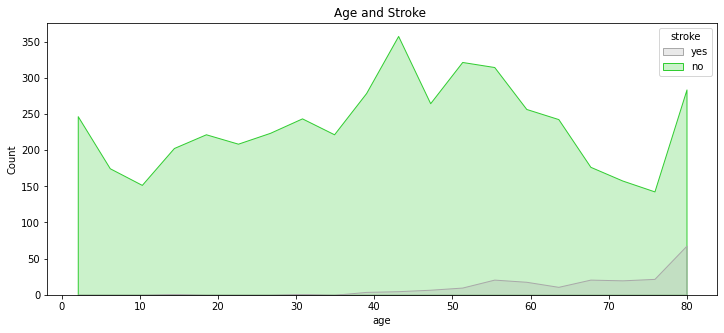

In [29]:
plt.figure(figsize=(12,5))
plt.title('Age and Stroke ')
sns.histplot(data=df[['age','stroke']],x='age',element='poly',hue='stroke', palette=["#A9A9A9","#32CD32"])
plt.savefig('SDAIA.png')

## Q4:Is smoking a cause of stroke?

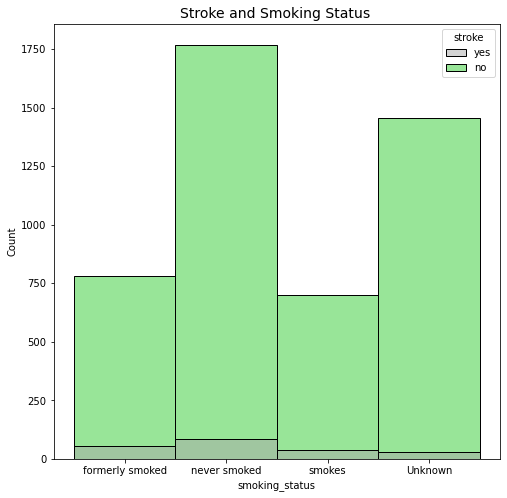

In [30]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x="smoking_status", hue="stroke", palette=["#A9A9A9","#32CD32"])
plt.title("Stroke and Smoking Status ",fontsize =14);#This statement for write in Title 
plt.savefig('SDAIA.png')

## Applying label encoding

In [31]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'stroke'.
df['stroke']= label_encoder.fit_transform(df['stroke'])
 
df['stroke'].unique()

array([1, 0])

In [32]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'gender'.
df['gender']= label_encoder.fit_transform(df['gender'])
 
df['gender'].unique()

array([1, 0])

In [33]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'ever_married'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
 
df['ever_married'].unique()

array([0, 1])

In [34]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'smoking_status'.
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
 
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [35]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'work_type'.
df['work_type']= label_encoder.fit_transform(df['work_type'])
 
df['work_type'].unique()

array([2, 3, 0, 4, 1])

In [36]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Residence_type'.
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
 
df['Residence_type'].unique()

array([1, 0])

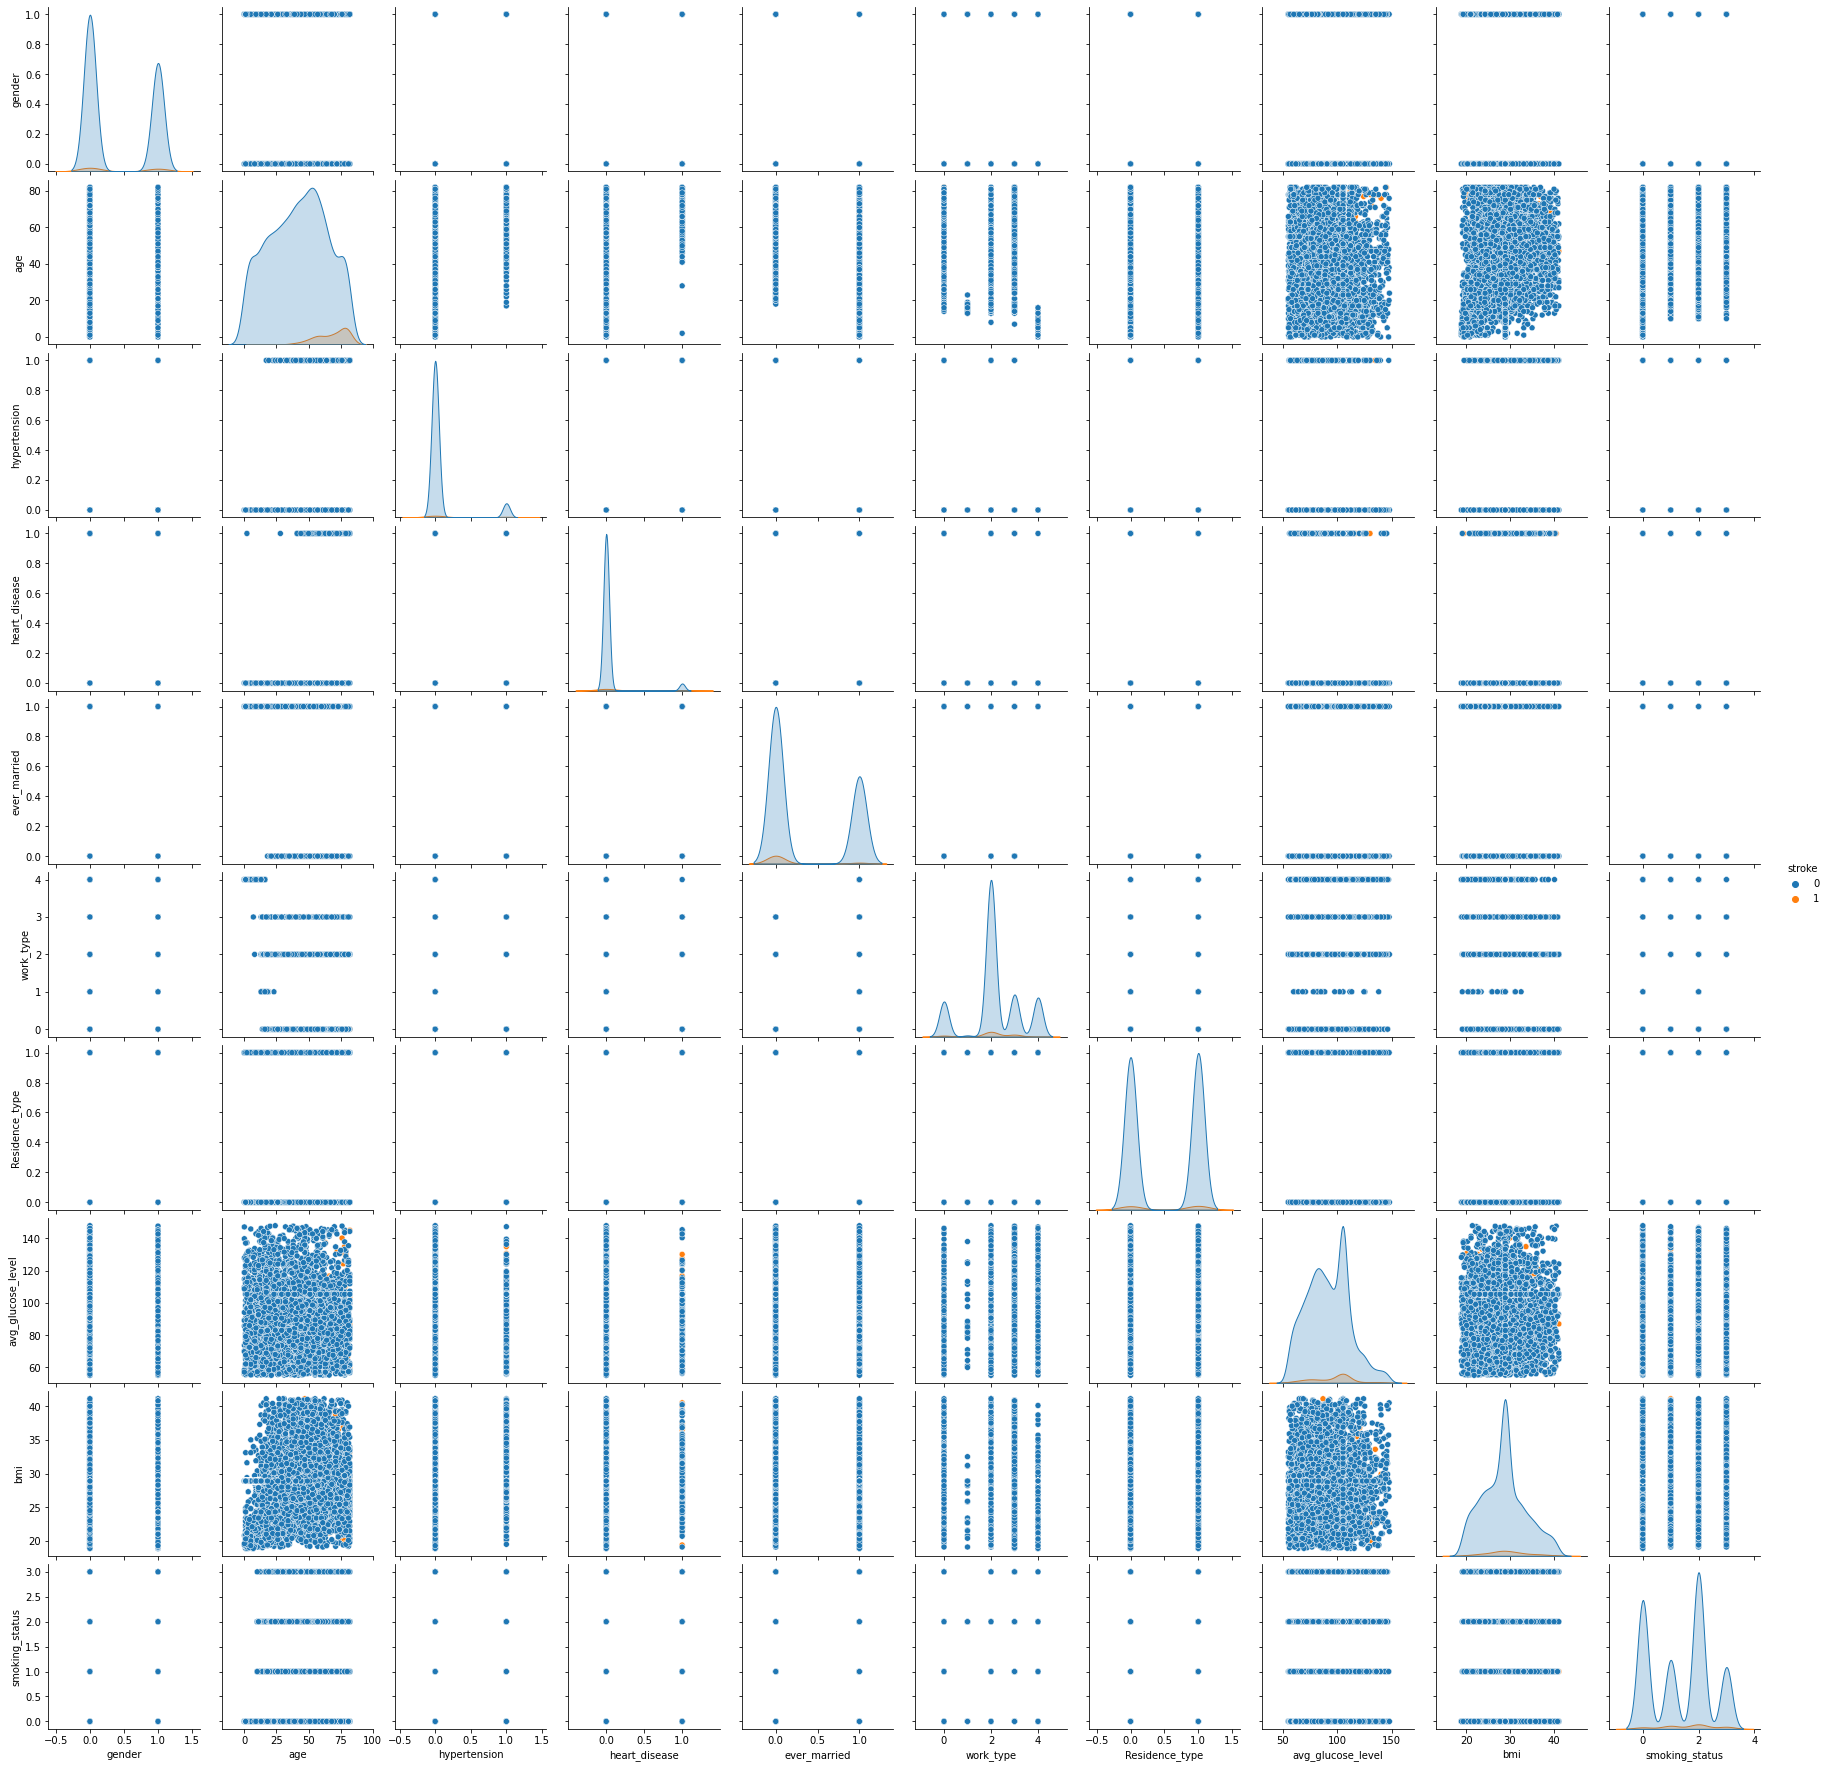

In [37]:
sns.pairplot(df,hue='stroke'); 

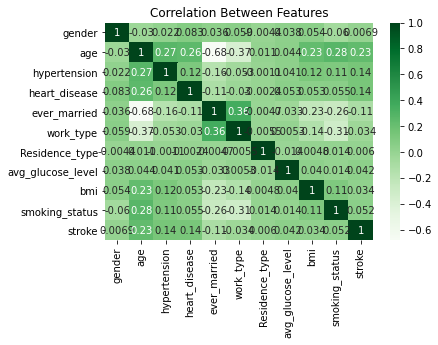

In [38]:
sns.heatmap(df.corr(),annot = True,cmap="Greens");
plt.title('Correlation Between Features'); #show Correlation Between Features

## Imblance problem 

In [39]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

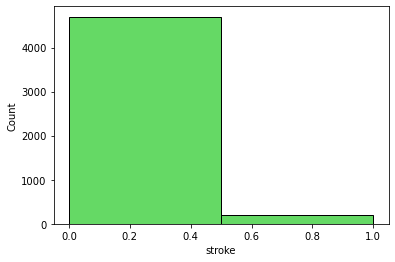

In [40]:
sns.histplot(df["stroke"],bins=2,color="#32CD32");
plt.savefig('SDAIA.png')

##### 

We notice that we hava imblance problem 

## Before Solving a Imblance problem :

## Split Data

In [41]:
R = df["stroke"]
W = df.drop('stroke',axis=1)

## Feature selection

In [42]:
print('Original X Shape is ' , W.shape)
FeatureSelection = SelectPercentile(score_func = chi2, percentile=40) # score_func can = f_classif
A = FeatureSelection.fit_transform(W,R)

Original X Shape is  (4908, 10)


In [43]:
print('Selected Features are : ' , FeatureSelection.get_support())

Selected Features are :  [False  True  True  True False False False  True False False]


In [44]:
R=df["stroke"]
W= df.filter(["age","hypertension","heart_disease"], axis=1)
W_train, W_test, R_train, R_test = train_test_split(W, R, test_size=0.20, random_state = 42)

In [45]:
scaler = MinMaxScaler()
W_train_scaled = scaler.fit_transform(W_train)
W_test_scaled = scaler.transform(W_test)

## Apply ML Model

## Here I take different machine learning algorithm and try find algorithm which predict accurately.
1-Logistic Regression


## LogisticRegression

In [46]:
penalty = ['l1', 'l2']
C = [0.001,0.01,0.5, 0.6, 0.7, 0.8,1,10,100,1000]

solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C,solver=solver)

print(param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.5, 0.6, 0.7, 0.8, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga']}


In [47]:
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(W_train_scaled, R_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
Best score:  0.9602651496734251


In [48]:
log_reg_predicted = grid.predict(W_test_scaled)
log_reg_matrix = confusion_matrix(R_test, log_reg_predicted)
log_reg_acc_score = accuracy_score(R_test, log_reg_predicted)
print(log_reg_matrix)
print("\n")
log_reg_acc_score = accuracy_score(R_test, log_reg_predicted)
print("Accuracy of Logistic Regression:",log_reg_acc_score*100,'\n')
print(classification_report(R_test,log_reg_predicted))

[[929   0]
 [ 53   0]]


Accuracy of Logistic Regression: 94.60285132382892 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



C:\Users\huawe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


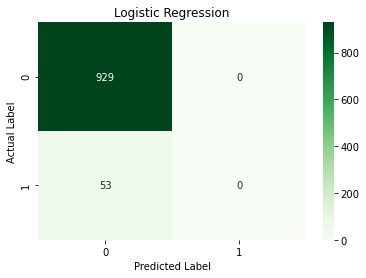

In [49]:
sns.heatmap(log_reg_matrix,annot= True,fmt='g', cmap=plt.cm.Greens)
plt.title('Logistic Regression');
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig('SDAIA.png')

## --------------------------------------------------------------------------------------------------------------------------------

## After Solving a Imblance problem :

In [50]:
y = df["stroke"]
X = df.drop('stroke',axis=1)

In [51]:
print('Original X Shape is ' , X.shape)
FeatureSelection = SelectPercentile(score_func = chi2, percentile=40) # score_func can = f_classif
A = FeatureSelection.fit_transform(X,y)

Original X Shape is  (4908, 10)


In [52]:
print('Selected Features are : ' , FeatureSelection.get_support())

Selected Features are :  [False  True  True  True False False False  True False False]


In [53]:
y=df["stroke"]
X= df.filter(["age","hypertension","heart_disease"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [54]:
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
X_over,y_over=rus.fit_resample(X_train,y_train)

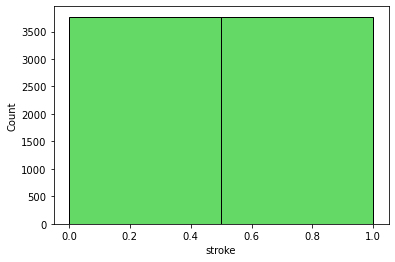

In [55]:
sns.histplot(y_over,bins=2,color="#32CD32");
plt.savefig('SDAIA.png')

In [56]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)

## Apply ML Model

## Here I take different machine learning algorithm and try find algorithm which predict accurately.
1-Logistic Regression

2-Decision Tree Classifier

3-Random Forest Classifier

4-K-Neighbors Classifier

5-Support Vector Classifier

6-XGB Classifier

7- Stacking 

## Logistic Regression

In [57]:
penalty = ['l1', 'l2']
C = [0.001,0.01,0.5, 0.6, 0.7, 0.8,1,10,100,1000]

solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C,solver=solver)

print(param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.5, 0.6, 0.7, 0.8, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga']}


In [58]:
log_reg = LogisticRegression(random_state=42)
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.001, random_state=42, solver='liblinear')
Best score:  0.9809018567639256


In [59]:
log_reg_predicted = grid.predict(X_test_scaled)
log_reg_matrix = confusion_matrix(y_test, log_reg_predicted)
log_reg_acc_score = accuracy_score(y_test, log_reg_predicted)
print(log_reg_matrix)
print("\n")
log_reg_acc_score = accuracy_score(y_test, log_reg_predicted)
print("Accuracy of Logistic Regression:",log_reg_acc_score*100,'\n')
print(classification_report(y_test,log_reg_predicted))

[[496 433]
 [  3  50]]


Accuracy of Logistic Regression: 55.60081466395111 

              precision    recall  f1-score   support

           0       0.99      0.53      0.69       929
           1       0.10      0.94      0.19        53

    accuracy                           0.56       982
   macro avg       0.55      0.74      0.44       982
weighted avg       0.95      0.56      0.67       982



In [60]:
print("Recall (Test Set): %.4f" % recall_score(y_test, log_reg_predicted))

Recall (Test Set): 0.9434


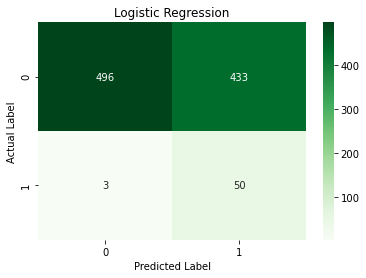

In [61]:
sns.heatmap(log_reg_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('Logistic Regression');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## K-Neighbors Classifier

In [62]:
k_range = list(range(1, 50))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']}


In [63]:
knn =KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 47, 'weights': 'distance'}
Best estimator:  KNeighborsClassifier(n_neighbors=47, weights='distance')
Best score:  0.6591511936339522


In [64]:
knn_predicted = grid.predict(X_test_scaled)
knn_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_matrix)
print("\n")
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of KNeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

[[828 101]
 [ 30  23]]


Accuracy of KNeighborsClassifier: 86.65987780040734 

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       929
           1       0.19      0.43      0.26        53

    accuracy                           0.87       982
   macro avg       0.58      0.66      0.59       982
weighted avg       0.92      0.87      0.89       982



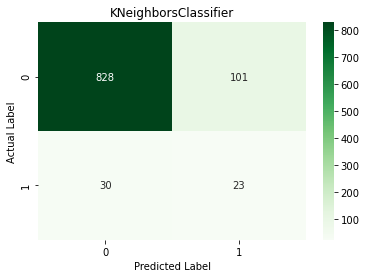

In [65]:
sns.heatmap(knn_matrix ,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('KNeighborsClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Decision Tree Classifier

In [66]:
dt_range = list(range(1, 31))
param_grid = dict(max_depth=dt_range)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [67]:
decisiontree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(decisiontree, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'max_depth': 3}
Best estimator:  DecisionTreeClassifier(max_depth=3, random_state=42)
Best score:  0.8888594164456233


In [68]:
dt_predicted = grid.predict(X_test_scaled)
dt_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(dt_matrix)
print("\n")
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

[[613 316]
 [  4  49]]


Accuracy of DecisionTreeClassifier: 67.41344195519349 

              precision    recall  f1-score   support

           0       0.99      0.66      0.79       929
           1       0.13      0.92      0.23        53

    accuracy                           0.67       982
   macro avg       0.56      0.79      0.51       982
weighted avg       0.95      0.67      0.76       982



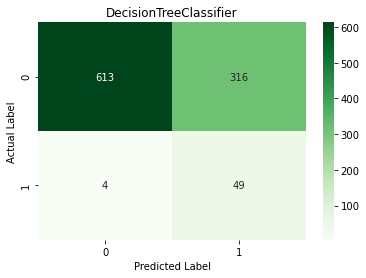

In [69]:
sns.heatmap(dt_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('DecisionTreeClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Random Forest Classifier

In [70]:
param_grid ={ 
    'n_estimators': [20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,10,12,15],
    'criterion' :['gini', 'entropy']
} 

print(param_grid)

{'n_estimators': [20, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [8, 10, 12, 15], 'criterion': ['gini', 'entropy']}


In [71]:
randomforest = RandomForestClassifier(random_state=42)
grid = GridSearchCV(randomforest, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 20}
Best estimator:  RandomForestClassifier(max_depth=12, n_estimators=20, random_state=42)
Best score:  0.8713527851458884


In [72]:
rf_predicted = grid.predict(X_test_scaled)
rf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(rf_matrix)
print("\n")
dt_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of RandomForestClassifier:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

[[709 220]
 [ 15  38]]


Accuracy of RandomForestClassifier: 76.06924643584522 

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       929
           1       0.15      0.72      0.24        53

    accuracy                           0.76       982
   macro avg       0.56      0.74      0.55       982
weighted avg       0.93      0.76      0.82       982



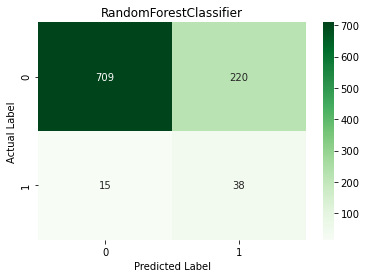

In [73]:
sns.heatmap(rf_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('RandomForestClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Support Vector Classifier

In [74]:
param_grid =[{ "kernel":["linear"]},
             {"kernel":["poly"],"degree":[2,3]},
             {"kernel":['rbf']},
    
            ]
#dict(n_estimators=rd_range)
print(param_grid);

[{'kernel': ['linear']}, {'kernel': ['poly'], 'degree': [2, 3]}, {'kernel': ['rbf']}]


In [75]:
svc =  SVC(random_state=42)
grid = GridSearchCV(svc, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'kernel': 'rbf'}
Best estimator:  SVC(random_state=42)
Best score:  0.8021220159151193


In [76]:
svc_predicted = grid.predict(X_test_scaled)
svc_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print(svc_matrix)
print("\n")
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

[[660 269]
 [  7  46]]


Accuracy of Support Vector Classifier: 71.89409368635438 

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       929
           1       0.15      0.87      0.25        53

    accuracy                           0.72       982
   macro avg       0.57      0.79      0.54       982
weighted avg       0.94      0.72      0.80       982



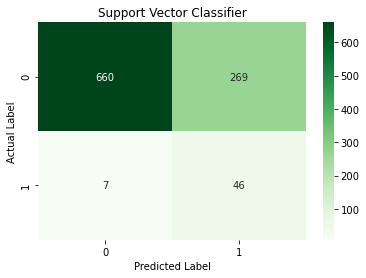

In [77]:
sns.heatmap(svc_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('Support Vector Classifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## XGB Classifier

In [78]:
param_grid ={'max_depth':range(2,10,1),
             'n_estimators':range(60,220,40),
             'learning_rate':[0.1,0.01,0.05]}
    
            
#dict(n_estimators=rd_range)
print(param_grid)

{'max_depth': range(2, 10), 'n_estimators': range(60, 220, 40), 'learning_rate': [0.1, 0.01, 0.05]}


In [79]:
warnings.filterwarnings('ignore')
gbm = xgboost.XGBClassifier(random_state=42)
grid = GridSearchCV(gbm, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_over)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

[20:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [80]:
gbm_predicted = grid.predict(X_test_scaled)
gbm_matrix = confusion_matrix(y_test, gbm_predicted)
gbm_acc_score = accuracy_score(y_test, gbm_predicted)
print(gbm_matrix)
print("\n")
gbm_acc_score = accuracy_score(y_test, gbm_predicted)
print("Accuracy of xgb.XGBClassifier:",gbm_acc_score*100,'\n')
print(classification_report(y_test,gbm_predicted))

[[619 310]
 [  4  49]]


Accuracy of xgb.XGBClassifier: 68.0244399185336 

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       929
           1       0.14      0.92      0.24        53

    accuracy                           0.68       982
   macro avg       0.57      0.80      0.52       982
weighted avg       0.95      0.68      0.77       982



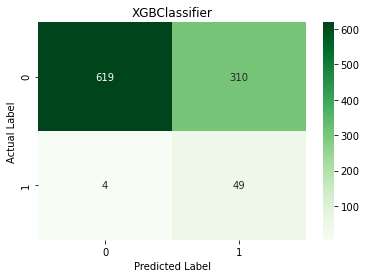

In [81]:
sns.heatmap(gbm_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('XGBClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");
plt.savefig('SDAIA.png')

## Stacking

In [82]:
model_vars = [LogisticRegression(C=0.001, random_state=42, solver='liblinear'), KNeighborsClassifier(n_neighbors=47, weights='distance')]
stacked = StackingClassifier(classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)
stacked.fit(X_train_scaled, y_over)
conf_matrix=confusion_matrix(y_test, stacked.predict(X_test))
lr_acc_score = accuracy_score(y_test, stacked.predict(X_test))
print(conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test, stacked.predict(X_test)))


[[824 105]
 [ 29  24]]


Accuracy of Logistic Regression: 86.35437881873727 

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       929
           1       0.19      0.45      0.26        53

    accuracy                           0.86       982
   macro avg       0.58      0.67      0.59       982
weighted avg       0.92      0.86      0.89       982



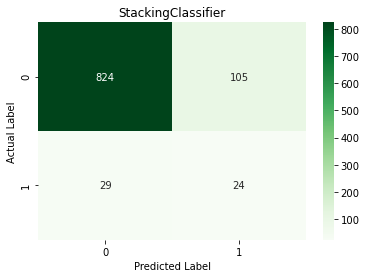

In [83]:
sns.heatmap(conf_matrix,annot= True,fmt='g', cmap=plt.cm.Greens);
plt.title('StackingClassifier');
plt.xlabel("Predicted Label");
plt.ylabel("Actual Label");

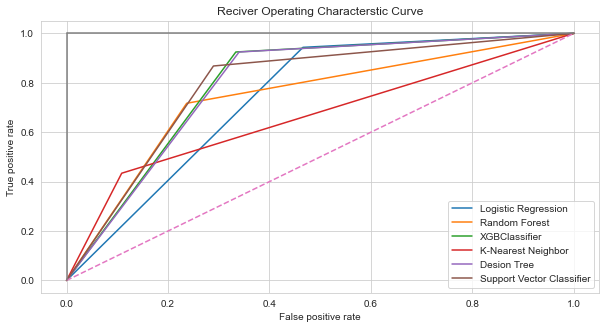

In [84]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,log_reg_predicted)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,gbm_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XGBClassifier')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()